# Machine Learning Exercise 1 - Linear Regression

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem. We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

###Linear Regression with One Variable 


In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.


In [197]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

Now let's create a table from the given data along with some stats and plot it. 

In [198]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [199]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


/Users/Nani/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


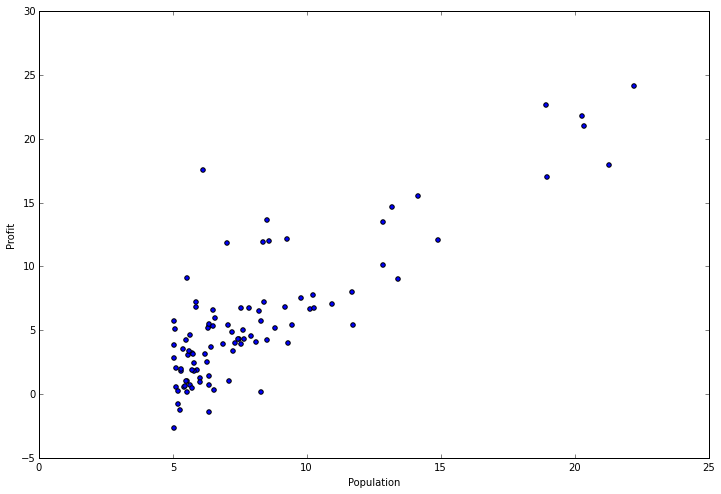

In [200]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function. The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.
First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

In [201]:
def computeCost(X, y, theta): 
    inner = np.power((X * theta.T)-y, 2)
    return np.sum(inner)/(2*len(X))

Now let's insert a column of 1's to the data to make getting a vectorized solution easier for computing the cost and gradients 

In [202]:
data.insert(0, 'Ones', 1)

Let's make X and Y look correct so we can convert them to matrices and compute costs

In [203]:
cols = data.shape[1]
X = data.iloc[:, :cols-1]
Y = data.iloc[:, cols-1:cols]

Let's take a look at X 

In [204]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


And Y 

In [205]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Now, to convert them to matrices and initialize our Theta vector 

In [206]:
X = np.matrix(X.values)
y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0])) 
theta

matrix([[0, 0]])

Let's make sure the shape of our matrices are correct

In [207]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now we will compute the cost using our initialized theta values - [0,0]

In [208]:
computeCost(X, y, theta)

32.072733877455676

So far so good. Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

In [209]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters): 
        error = (X * theta.T) - y
        
        for j in range(parameters): 
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
        
        theta = temp 
        cost[i] = computeCost(X, y, theta)
    
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [210]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [211]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.


In [212]:
computeCost(X, y, g)

4.5159555030789118

Now let's plot the linear model along with the data to visually see how well it fits.


/Users/Nani/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


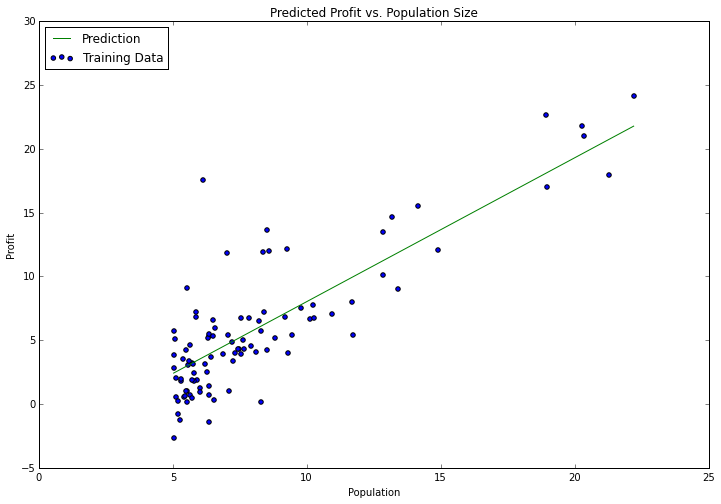

In [213]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1]*x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

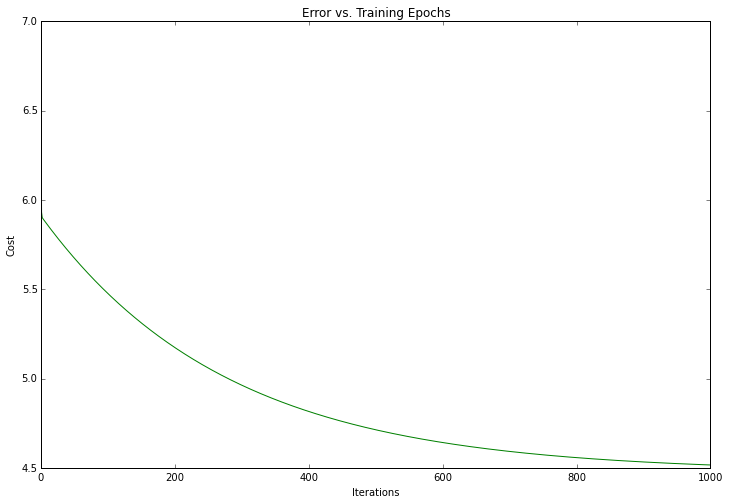

In [214]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epochs')

###Linear Regression with Multiple Variables

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). Let's use the techniques we already applied to analyze that data set as well.

In [232]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features. This is very easy with pandas.


In [233]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.


In [234]:
#add ones column
data2.insert(0, 'ones', 1)

#set X(training data) and y (target variable)
cols2 = data2.shape[1]
X2 = data2.iloc[:, :cols2-1]
Y2 = data2.iloc[:, cols2-1:cols2]

#convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(Y2.values)
theta2 = np.matrix([0,0,0])

#perform linear regression on the data set 
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

#get the cost(error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

We can take a quick look at the training progess for this one as well.


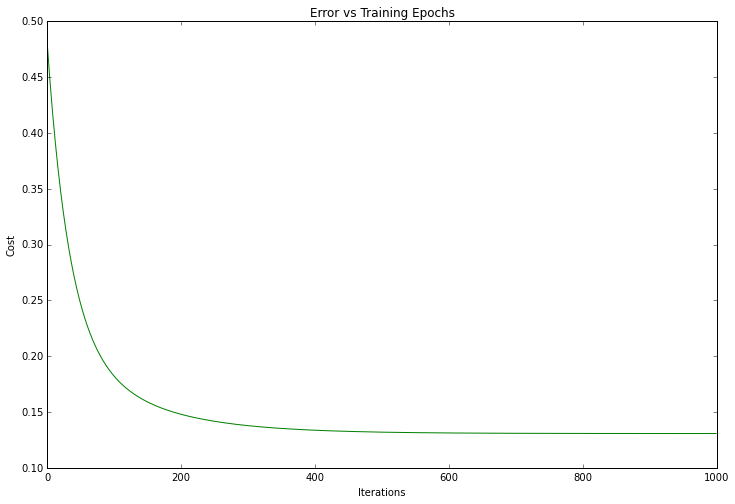

In [235]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epochs')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function. Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.


In [237]:
from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/Nani/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


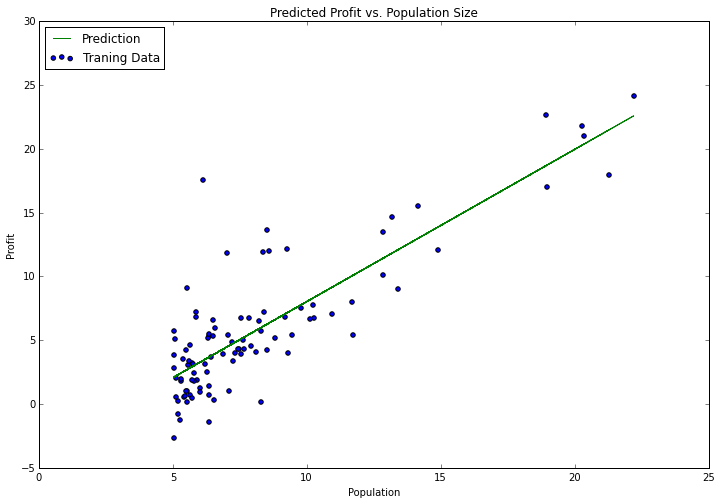

In [241]:

x = np.array(X[:, 1].A1)
f = model.predict(X)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

That's all! Exercise 2 is on logistic regression for classification problems :)